In [10]:
import pandas as pd

# Read the CSV file into a DataFrame
ehdata = pd.read_csv('ehb.csv')

# Remove '$' symbol from the 'Cost' column and convert it to a numeric type
ehdata['Cost'] = ehdata['Cost'].replace({'\$': ''}, regex=True).astype(float)

# Sort the data based on the 'Cost' column in ascending order
sorted_data = ehdata.sort_values(by='Cost')

# Rewrite the sorted data to the same CSV file
sorted_data.to_csv('ehdata.csv', index=False)

print('sorted by cost')


sorted by cost


In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
ehdata = pd.read_csv('ehb.csv')

# Remove '$' symbol from the 'Cost' column and convert it to a numeric type
ehdata['Cost'] = ehdata['Cost'].replace({'\$': ''}, regex=True).astype(float)

# Remove commas from 'Favorite' column values and convert it to an integer
ehdata['Favorite'] = ehdata['Favorite'].replace(',', '', regex=True).astype(int)

# Define cost ranges
cost_ranges = [(0, 2),(2,10),(10, 50)]

# Define favorite ranges
favorite_ranges = [(0, 20), (20, 200),(200, 500),(500,1000), (1000, 2000),(2000,4000), (4000, float('inf'))]

# Function to categorize cost and favorite ranges
def categorize_range(value, ranges):
    for i, (start, end) in enumerate(ranges):
        if start <= value < end:
            return i
    return len(ranges) - 1

# Categorize cost and favorite ranges
ehdata['Cost_Group'] = ehdata['Cost'].apply(lambda x: categorize_range(x, cost_ranges))
ehdata['Favorite_Group'] = ehdata['Favorite'].apply(lambda x: categorize_range(x, favorite_ranges))

# Group by 'Cost_Group' and 'Favorite_Group', then sort within each group based on 'Favorite'
sorted_data = ehdata.groupby(['Cost_Group', 'Favorite_Group']).apply(lambda x: x.sort_values('Favorite')).reset_index(drop=True)

# Save the sorted data to the same 'ehdata.csv' file, overwriting it
sorted_data.to_csv('ehb.csv', index=False)

# Display or use the sorted data as needed
print("Data has been sorted and saved back to the same 'ehdata.csv' file after removing commas from 'Favorite'.")


Data has been sorted and saved back to the same 'ehdata.csv' file after removing commas from 'Favorite'.


In [13]:
import pandas as pd

# Read the updated 'ehdata.csv' file into a DataFrame
ehdata = pd.read_csv('ehb.csv')

# Remove '$' symbol from the 'Cost' column and convert it to a numeric type
ehdata['Cost'] = ehdata['Cost'].replace({'\$': ''}, regex=True).astype(float)

# Remove commas from 'Favorite' and 'Review' column values and convert them to integers
ehdata['Favorite'] = ehdata['Favorite'].replace(',', '', regex=True).astype(int)
ehdata['Review'] = ehdata['Review'].replace(',', '', regex=True).astype(int)
ehdata['Total Sale'] = ehdata['Total Sale'].replace(',', '', regex=True).astype(float)

# Define favorite ranges
favorite_ranges = [(0, 20), (20, 200),(200, 500),(500,1000), (1000, 2000),(2000,4000), (4000, float('inf'))]

# Define review ranges
review_ranges = [(0, 5), (5, 20),(20,30),(30,50),(51, 200), (201, 500), (501, 1000), (1001, 5000), (5001, float('inf'))]

# Function to categorize review ranges
def categorize_review(value, ranges):
    for i, (start, end) in enumerate(ranges):
        if start <= value <= end:
            return i
    return len(ranges) - 1

# Categorize review ranges
ehdata['Review_Group'] = ehdata['Review'].apply(lambda x: categorize_review(x, review_ranges))

# Group by 'Favorite_Group' and 'Review_Group', then sort within each group based on 'Review'
sorted_data = ehdata.groupby(['Favorite_Group', 'Review_Group']).apply(lambda x: x.sort_values('Review')).reset_index(drop=True)

# Save the sorted data to the same 'ehdata.csv' file, overwriting it
sorted_data.to_csv('ehb.csv', index=False)

# Display or use the sorted data as needed
print("Data has been sorted based on 'Favorite_Group' and 'Review_Group', commas from 'Favorite' and 'Review' columns have been removed, and the data has been saved back to the same 'ehdata.csv' file.")


Data has been sorted based on 'Favorite_Group' and 'Review_Group', commas from 'Favorite' and 'Review' columns have been removed, and the data has been saved back to the same 'ehdata.csv' file.


In [14]:
import pandas as pd

# Read the CSV file
file_path = 'ehb.csv'
data = pd.read_csv(file_path)

# Sort the data based on specified columns (Cost_Group, Favorite_Group, Review_Group)
sorted_data = data.sort_values(by=['Cost_Group', 'Favorite_Group', 'Review_Group'])

# Save the changes to the same file
sorted_data.to_csv(file_path, index=False)  # Set index=False to exclude the index column in the output


In [67]:
import pandas as pd

# Read the updated CSV file
file_path = 'ehb.csv'
data = pd.read_csv(file_path)

# Group the data based on Cost_Group, Favorite_Group, and Review_Group
grouped_data = data.groupby(['Cost_Group', 'Favorite_Group', 'Review_Group'])

# Calculate correlation for each group
correlation_per_group = grouped_data[['Total Sale', 'Review', 'Favorite', 'Cost']].corr()

# Display correlations along with group codes and number of rows within each group
for (cost_group, favorite_group, review_group), group in grouped_data:
    group_size = len(group)
    print(f"Group Codes: {cost_group}, {favorite_group}, {review_group}")
    print(f"Number of Rows in Group: {group_size}")
    print(correlation_per_group.loc[(cost_group, favorite_group, review_group)])
    print("\n")


Group Codes: 0, 0, 0
Number of Rows in Group: 117
            Total Sale    Review  Favorite      Cost
Total Sale    1.000000 -0.038450  0.049819  0.019838
Review       -0.038450  1.000000  0.325711 -0.062400
Favorite      0.049819  0.325711  1.000000 -0.049153
Cost          0.019838 -0.062400 -0.049153  1.000000


Group Codes: 0, 1, 0
Number of Rows in Group: 6
            Total Sale    Review  Favorite      Cost
Total Sale    1.000000  0.753821       NaN  0.277009
Review        0.753821  1.000000       NaN  0.164969
Favorite           NaN       NaN       NaN       NaN
Cost          0.277009  0.164969       NaN  1.000000


Group Codes: 1, 0, 0
Number of Rows in Group: 16
            Total Sale    Review  Favorite  Cost
Total Sale    1.000000 -0.045310  0.235185   NaN
Review       -0.045310  1.000000  0.368403   NaN
Favorite      0.235185  0.368403  1.000000   NaN
Cost               NaN       NaN       NaN   NaN


Group Codes: 1, 1, 0
Number of Rows in Group: 1
            Total Sale  

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Load the data
file_path = 'ehb.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Step 2: Explore the data (if needed)

# Step 3: Prepare data for regression
X = data[['Review', 'Favorite', 'Cost']]  # Features: Review, Favorite, Cost
y = data['Total Sale']  # Target variable: Total Sale

# Step 4: Train the regression model
model = LinearRegression()  # Create a Linear Regression model
model.fit(X, y)  # Train the model

# Step 5: Print the formula of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

formula = f"Total Sale = {intercept:.2f} + {coefficients[0]:.2f} * Review + {coefficients[1]:.2f} * Favorite + {coefficients[2]:.2f} * Cost"
print("Linear Regression Formula for Total Sale:")
print(formula)


Linear Regression Formula for Total Sale:
Total Sale = 28.57 + -1.52 * Review + 0.76 * Favorite + -0.17 * Cost


In [61]:
import pandas as pd

# Read the CSV file
file_path = 'campare1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate the percentage variation between Sales and Calculated Sales
data['Sales'] = data['Sales'].astype(float)
data['Calculated Sales'] = data['Calculated Sales'].astype(float)

data['Variation (%)'] = ((data['Calculated Sales'] - data['Sales']) / data['Sales']) * 100

# Update the CSV file with the new data including the variation
data.to_csv(file_path, index=False)

print("File updated with Variation (%) in 'Variation (%)' column.")

File updated with Variation (%) in 'Variation (%)' column.


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Predicting values using the model
y_pred = model.predict(X)

# Calculating evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)  # Change cv as needed
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Score: {cv_scores.mean():.2f}")


Mean Absolute Error: 34.46
Mean Squared Error: 3790.72
R-squared Score: 0.00
Cross-validation Scores: [-0.00716052 -0.00735064 -0.09302836 -0.32502807 -0.12148254]
Mean Cross-validation Score: -0.11


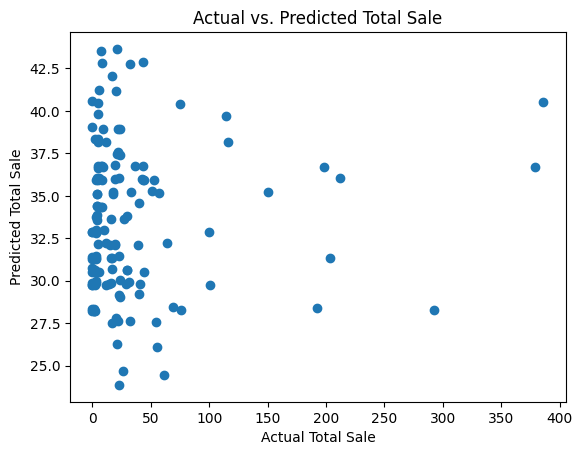

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Total Sale')
plt.ylabel('Predicted Total Sale')
plt.title('Actual vs. Predicted Total Sale')
plt.show()


In [15]:
import pandas as pd

# Load the data
file_path = 'ehb.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Calculate conversion rates
data['Review_to_Sales_Conversion'] = data['Total Sale'] / data['Review']
data['Favorite_to_Sales_Conversion'] = data['Total Sale'] / data['Favorite']
data['Views_to_Sales_Conversion'] = data['Total Sale'] / data['Views']

# Save the updated data to the file
updated_file_path = 'updated_ehb1.csv'  # Replace with the desired file path
data.to_csv(updated_file_path, index=False)

print("Conversion rates of reviews and favorites to total sales added to the file 'updated_ehb.csv'.")


Conversion rates of reviews and favorites to total sales added to the file 'updated_ehb.csv'.
